## Kaggle Bike Demand Predictions 

## Step 1 - Import the required python libraries 

In [6]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## Step 2 Read the Data

In [7]:
bikes = pd.read_csv('hour.csv')


In [8]:
bikes.shape

(17379, 17)

In [9]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Step 3 - Preliminary Analysis and Feature Selection

In [15]:
bikes_prep = bikes.copy()

In [16]:
bikes_prep = bikes_prep.drop(['index','date','casual','registered'],axis =1)


In [17]:
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [18]:
bikes_prep.shape

(17379, 13)

## Basic checks of Missing Values

In [19]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

## Visualise the data using pandas histogram

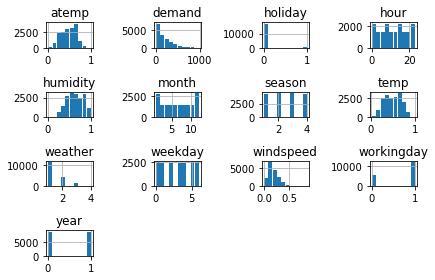

In [22]:
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout()

## Notes:

## predicted variable demand is not normally distributed 
## Features to be dropped 
## Weekday , Years, WorkingDay, atempm windspeed
## Hight Auto Correlation for demand feature

## Step 3 - Data Visualisation

In [24]:
##Visualise the Continous featured vs Demand

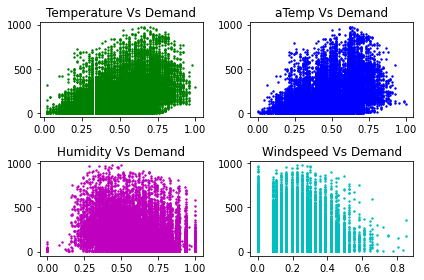

In [32]:
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'], s=2 , c='g')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'], s=2 , c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'], s=2, c= 'm')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'], s=2 , c='c')

plt.tight_layout()
plt.show()

In [33]:
#plot the categorical features vs demand
#Create 3*3 subplot

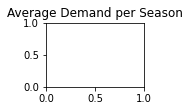

In [45]:
plt.subplot(3,3,1)
plt.title('Average Demand per Season')
#Create a list of unique season's values
cat_list = bikes_prep['season'].unique()

#Create average demand per season using groupby
cat_average = bikes_prep.groupby('season').mean()['demand']

colours = ['g','r','m','b']


In [46]:
cat_list

array([1, 2, 3, 4], dtype=int64)

In [47]:
cat_average

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: demand, dtype: float64

<BarContainer object of 4 artists>

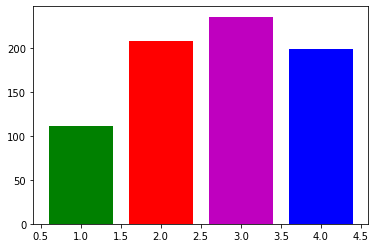

In [50]:
plt.bar(cat_list , cat_average,color = colours)

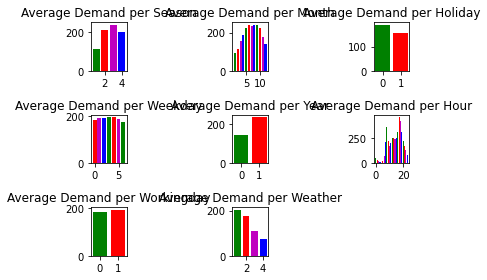

In [62]:
plt.subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list , cat_average,color = colours)

plt.subplot(3,3,2)
plt.title('Average Demand per Month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list , cat_average,color = colours)

plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list , cat_average,color = colours)

plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list , cat_average,color = colours)

plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list , cat_average,color = colours)

plt.subplot(3,3,6)
plt.title('Average Demand per Hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list , cat_average,color = colours)

plt.subplot(3,3,7)
plt.title('Average Demand per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list , cat_average,color = colours)

plt.subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list , cat_average,color = colours)

plt.tight_layout()
plt.show()

<BarContainer object of 24 artists>

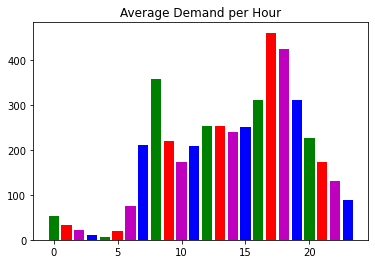

In [63]:
plt.title('Average Demand per Hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list , cat_average,color = colours)

## Check for Outliers

In [64]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [66]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

## Step 4 -  Check Multiple Linear Regression Assumptions


In [67]:
#Linearity using correlartion coefficient matrix using corr

In [71]:
correlation = bikes_prep[['temp','atemp','humidity','windspeed','demand']].corr()

In [72]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [78]:
bikes_prep = bikes_prep.drop(['weekday','year','workingday','atemp','windspeed'], axis =1)

In [79]:
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


In [80]:
bikes_prep.shape

(17379, 8)

In [81]:
# Check the autocorrelation in demand  using acorr

In [82]:
df1 = pd.to_numeric(bikes_prep['demand'], downcast = 'float')

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474824, 0.4704966 , 0.4962292 , 0.4940417 , 0.46796042,
        0.47732154, 0.52675885, 0.5914588 , 0.65201724, 0.71519715,
        0.805912  , 0.9253118 , 1.        , 0.9253118 , 0.805912  ,
        0.71519715, 0.65201724, 0.5914588 , 0.52675885, 0.47732154,
        0.46796042, 0.4940417 , 0.4962292 , 0.4704966 , 0.45474824],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1f9f49dc288>)

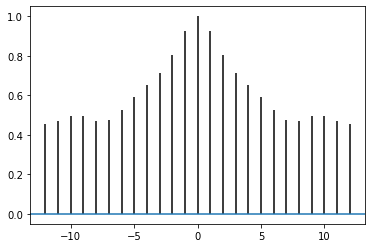

In [84]:
plt.acorr(df1, maxlags = 12)

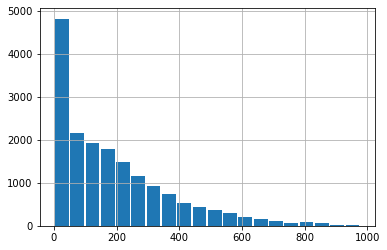

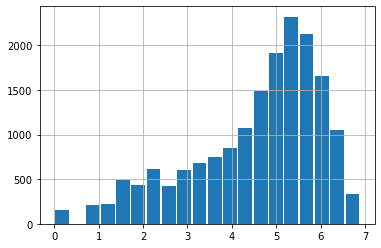

In [85]:
df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9 , bins= 20)

plt.figure()
df2.hist(rwidth=0.9 , bins= 20)

In [86]:
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [87]:
bikes_prep['demand'] 

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
           ...   
17374    4.779123
17375    4.488636
17376    4.499810
17377    4.110874
17378    3.891820
Name: demand, Length: 17379, dtype: float64

In [88]:
#Autocorrelaion in demand column


In [94]:
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2 .columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3 .columns = ['t-3']

In [95]:
bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3],axis =1)

In [96]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [97]:
bikes_prep_lag = bikes_prep_lag.dropna()

In [98]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


## Step 7 - create dummy varibles and drop first to avoid dummy variables trap using get_dummies  

## - season, holiday, weather, month, year

In [101]:
dummy_df = pd.get_dummies(bikes_prep_lag, drop_first = True)

In [102]:
dummy_df

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [103]:
type(dummy_df)

pandas.core.frame.DataFrame

In [104]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [112]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

KeyError: 'season'

In [109]:
bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first = True)

In [111]:
bikes_prep_lag 

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [113]:
bikes_prep_lag.shape

(17376, 47)

## Step 8  -  Create Train and Test Split

In [116]:
#split the  X and Y dataset into training and testing set 

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size =0.4,random_state =1234)

NameError: name 'X' is not defined

In [120]:
#demand is the time dependent

In [121]:
Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'],axis = 1)

In [122]:
X.head()

,temp,humidity,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,3.465736,3.688879,2.772589,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,2.564949,3.465736,3.688879,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,2.564949,3.465736,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.000000,0.000000,2.564949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,0.693147,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
Y.head()

,demand
3,2.564949
4,0.000000
5,0.000000
6,0.693147
7,1.098612


In [273]:
#Create the size of 70% of data

In [274]:
tr_size = 0.7 *len(X)
tr_size = int(tr_size)


In [275]:
X_train = X.values[0:tr_size]
X_test = X.values[tr_size : len(X)]

In [276]:
Y_train = Y.values[0:tr_size]
Y_test = Y.values[tr_size : len(Y)]

## Fit and Score the Model

In [277]:
## Linear Regression

In [278]:
from sklearn.linear_model import LinearRegression


In [279]:
std_reg = LinearRegression()

In [280]:
std_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [284]:
r2_train = std_reg.score(X_train,Y_train)
r2_train

0.9195240591465778

In [285]:
r2_test = std_reg.score(X_test,Y_test)
r2_test

0.9287151360253388

In [286]:
#create Y predictions

In [287]:
Y_predict = std_reg.predict(X_test)

In [288]:
Y_predict

array([[3.21001759],
       [2.86500541],
       [3.21845645],
       ...,
       [4.28217873],
       [4.20477445],
       [3.64981435]])

In [289]:
from sklearn.metrics import mean_squared_error

In [290]:
rmse = math.sqrt(mean_squared_error(Y_test,Y_predict))

In [291]:
rmse

0.380988004981704

## Final Step - Calculate RMSLE and Compare results

In [292]:
Y_test_e = []
Y_predict_e = []

In [293]:
for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

In [294]:
# Do the sum of the logs and Squares

In [295]:
log_sq_sum = 0.0


In [296]:
for i in range(0,len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

In [297]:
rmlse = math.sqrt(log_sq_sum /len(Y_test))


In [298]:
print("")
print(rmlse)


0.3560941706980208


In [ ]:
# =====================================================Completed==========================================================#

## Final RMLSE SCORE = 0.3560941706980208